In [ ]:
import numpy as np
import sympy as sp
import copy
import matplotlib.pyplot as plt
import math

In [ ]:
x_vals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_vals = [0.0, 0.41, 0.79, 1.13, 1.46, 1.76, 2.04, 2.3, 2.55, 2.79, 3.01]
k = 8
m = 4
y_vals = [ (p_vals[i] + ((-1) ** k) * m) for i in range(len(x_vals))]

In [ ]:
x_vals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_vals = [0.0, 0.41, 0.79, 1.13, 1.46, 1.76, 2.04, 2.3, 2.55, 2.79, 3.01]
k = 8
m = 4
y_vals = [ (p_vals[i] + ((-1) ** k) * m) for i in range(len(x_vals))]
y_vals[1]+=0.1
y_vals[3]+=0.1
y_vals[7]+=0.01

In [ ]:
def my_func(x_val,k,m):
  return x_val + ((-1) ** k) * m

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')

In [ ]:
def chebyshev_alternance(x_vals,y_vals,polinom_exp):
    for i,x_val in enumerate(x_vals):
        print(polinom_exp.subs(x,x_val)-y_vals[i])
    return 0

In [ ]:
def inter_error(x_vals):
    polinom=1
    n=len(x_vals)
    for x_val in x_vals:
        polinom=polinom*(x-x_val)
    polinom_vals=[]
    koefs=np.arange(0,1,0.01)
    for koef in koefs:
        polinom_vals.append(abs(polinom.subs(x,koef)))
    return max(polinom_vals)/math.factorial(n+1)

In [ ]:
koef=inter_error(x_vals)
koef

8.68412305088672e-15

In [ ]:
def inter_error_lagrange(x_vals,lagrange_exp):
  polynomial=1
  for x_val in x_vals:
    polynomial=polynomial*(x-x_val)
  m_l=sp.diff(lagrange_exp,x,len(x_vals)+1)

  arg_l=[]
  if m_l!=0:
    for x_val in x_vals:
      arg_l=m_l.subs(x,x_val)
    m_l=max(arg_l)
  else:
    return 0

  return m_l*polynomial/math.factorial

In [ ]:
def inter_error_newton(x_vals,newton_exp):
  polynomial=1
  for x_val in x_vals:
    polynomial=polynomial*(x-x_val)
  m_n=sp.diff(newton_exp,x,len(x_vals)+1)

  arg_l=[]
  if m_n!=0:
    for x_val in x_vals:
      arg_l=m_n.subs(x,x_val)
      m_n=max(arg_l)
  else:
    return 0

  return m_n*polynomial/math.factorial

In [ ]:
def plot_func(lagrange_exp,newton_exp,x_vals,y_vals):
  plt.plot(x_vals,y_vals,'-',color='r',label='Main')

  y_lag=[]
  for x_val in x_vals:
    y_lag.append(lagrange_exp.subs(x,x_val))
  plt.plot(x_vals,y_lag,'v',color='g',label='Lagrange')

  y_newt=[]
  for x_val in x_vals:
    y_newt.append(newton_exp.subs(x,x_val))
  plt.plot(x_vals,y_newt,'--',color='b',label='Newton')

  plt.ylabel('f(x)')
  plt.xlabel('x')
  plt.legend()
  plt.show()

In [ ]:
def P_k_x(x_vals,k):
  polynomial=1

  for x_val in x_vals:
    if x_val!=x_vals[k]:
      polynomial=polynomial*(x-x_val)

  koef=1
  for i in range(len(x_vals)):
      if i!=k:
        koef=koef*(x_vals[k]-x_vals[i])

  return sp.expand(polynomial)/koef

In [ ]:
def lagrange(y_vals,x_vals):
  ans=0
  for i in range(len(x_vals)):
    ans+=y_vals[i]*P_k_x(x_vals,i)
  return ans

In [ ]:
lagrange_exp=lagrange(y_vals,x_vals)

In [ ]:
def divided_difference(x_vals,y_vals):
  if len(x_vals)==2:
    if y_vals[0] is None:
      return (y_vals[1]-my_func(x,8,4))/(x_vals[1]-x_vals[0])
    else:
      return (y_vals[1]-y_vals[0])/(x_vals[1]-x_vals[0])
  return (divided_difference(x_vals[1:],y_vals[1:])-divided_difference(x_vals[0:len(x_vals)-1],y_vals[0:len(x_vals)-1]))/(x_vals[len(x_vals)-1]-x_vals[0])

In [ ]:
def Newton(x_vals,y_vals):
  polynomial=y_vals[0]
  dd=0
  for i in range(len(x_vals)-1):
    dd=divided_difference(x_vals[0:i+2],y_vals[0:i+2])
    for j in range(len(x_vals[0:i+2])-1):
      dd=dd*(x-x_vals[j])
    polynomial+=dd
  return polynomial

In [ ]:
newton_exp=Newton(x_vals,y_vals)

In [ ]:
x_vals_extend=x_vals
y_vals_extend=y_vals

x_vals_extend.insert(0,x)
y_vals_extend.insert(0,None)

In [ ]:
N_newt=newton_exp

polinom=sp.simplify(divided_difference(x_vals_extend,y_vals_extend))
for x_val in x_vals:
  polinom=polinom*(x-x_val)
print(polinom)
N_newt+=polinom

0


In [ ]:
plot_func(lagrange_exp,newton_exp,x_vals,y_vals)

In [ ]:
def Main(x_vals,y_vals):
  newton_exp=Newton(x_vals,y_vals)
  print(f"Newton polinom = {sp.expand(newton_exp)}\n")
  print(f"Newton_polino(0.47) = {round(newton_exp.subs(x,0.47),11)}\n")
  print("====================================================\n")
  lagrange_exp=lagrange(y_vals,x_vals)
  print(f"Lagrange polinom = {lagrange_exp}\n")
  print(f"Lagrange_polino(0.47) = {round(lagrange_exp.subs(x,0.47),11)}\n\n")
  plot_func(lagrange_exp,newton_exp,x_vals,y_vals)
  return newton_exp.subs(x,0.47),lagrange_exp.subs(x,0.47)

Newton polinom = 3279.32098765448*x**10 - 16823.7433862442*x**9 + 37136.2433862451*x**8 - 46113.5912698433*x**7 + 35322.1643518533*x**6 - 17192.6215277784*x**5 + 5268.12692901254*x**4 - 966.267030423313*x**3 + 92.7493452380982*x**2 + 0.628214285714181*x + 4.0

Newton_polino(0.47) = 5.67265207971


Lagrange polinom = 3279.32098765372*x**10 - 16823.7433862448*x**9 + 37136.2433862277*x**8 - 46113.5912698439*x**7 + 35322.1643518456*x**6 - 17192.6215277652*x**5 + 5268.12692901021*x**4 - 966.267030422622*x**3 + 92.7493452380729*x**2 + 0.628214285715162*x + 4.0

Lagrange_polino(0.47) = 5.67265207984




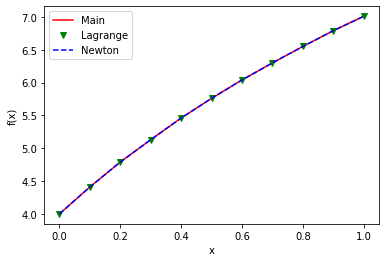

In [ ]:
newton_exp_1,lagrange_exp_1=Main(x_vals,y_vals)

Newton polinom = -35852.0723104053*x**10 + 185887.896825395*x**9 - 415211.640211636*x**8 + 522378.472222218*x**7 - 405926.678240737*x**6 + 200742.795138887*x**5 - 62632.8408840383*x**4 + 11750.898313492*x**3 - 1186.16335317459*x**2 + 52.3424999999997*x + 4.0

Newton_polino(0.47) = 5.66558115259


Lagrange polinom = -35852.0723104062*x**10 + 185887.896825393*x**9 - 415211.640211649*x**8 + 522378.472222216*x**7 - 405926.678240742*x**6 + 200742.795138901*x**5 - 62632.8408840404*x**4 + 11750.8983134926*x**3 - 1186.16335317461*x**2 + 52.3425000000009*x + 4.0

Lagrange_polino(0.47) = 5.66558115277




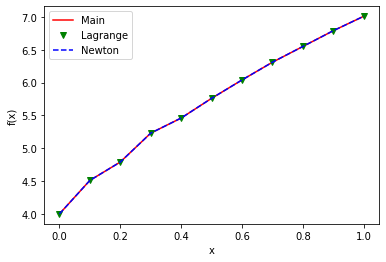

In [ ]:
newton_exp_2,lagrange_exp_2=Main(x_vals,y_vals)

In [ ]:
round(abs(abs(newton_exp_1)-abs(newton_exp_2)),11)

0.00707092712

In [ ]:
round(abs(abs(lagrange_exp_1)-abs(lagrange_exp_2)),12)

0.007070927070

In [ ]:
chebyshev_alternance(x_vals,y_vals,lagrange_exp)

0
4.28101998295460e-13
4.68514116391816e-12
2.31237251568928e-11
7.24549309438771e-11
1.53923096490871e-10
1.88683735302675e-10
-1.15778497900010e-10
-1.51048862306880e-9
-5.61616619876304e-9
-1.55394079826010e-8


0

In [ ]:
chebyshev_alternance(x_vals,y_vals,newton_exp)

0
0
0
0
0
0
0
0
0
-2.66453525910038e-15
5.32907051820075e-15


0